First 5 Rows of Data:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
Column Names: Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]'

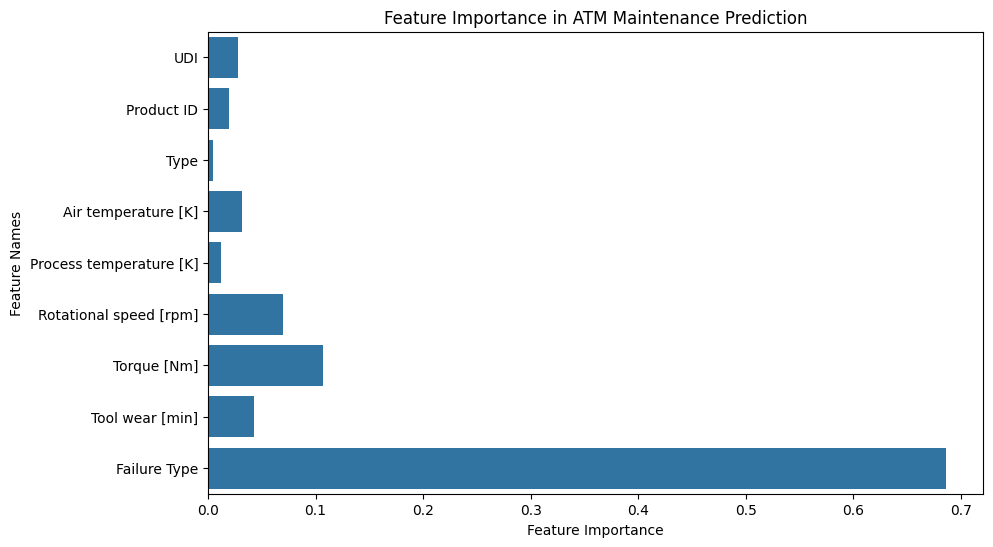

In [14]:
# Jupyter Notebook Code for Predictive Maintenance for ATMs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import json
import chardet
import joblib
import os

# Detect encoding
file_path = "predictive_maintenance.csv"  # Ensure this path is correct
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Check if it's actually a CSV file
if file_path.endswith(".zip"):
    raise ValueError("The provided file is a ZIP. Extract and use the actual CSV.")

if file_path.endswith(".xlsx"):
    print("Detected an Excel file. Reading as Excel...")
    df = pd.read_excel(file_path)
else:
    # Detect encoding
    with open(file_path, "rb") as f:
        raw_data = f.read(10000)
        result = chardet.detect(raw_data)
        encoding_detected = result["encoding"] if result["encoding"] else "ISO-8859-1"

    # Load CSV
    df = pd.read_csv(file_path, encoding=encoding_detected, engine="python", on_bad_lines="skip")

# Check if the file was loaded properly
print("First 5 Rows of Data:")
print(df.head())

# Validate column names
print("Column Names:", df.columns)



# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables if any
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save label encoders
with open("label_encoders.json", "w") as f:
    json.dump({col: le.classes_.tolist() for col, le in label_encoders.items()}, f)

# Define features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the model and scaler
joblib.dump(model, "atm_maintenance_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Ensure feature importance visualization works
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in ATM Maintenance Prediction")
plt.show()


In [12]:
print(df["Target"].value_counts())

Target
0    9661
1     339
Name: count, dtype: int64


First 5 Rows of Data:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
Column Names: ['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Pro

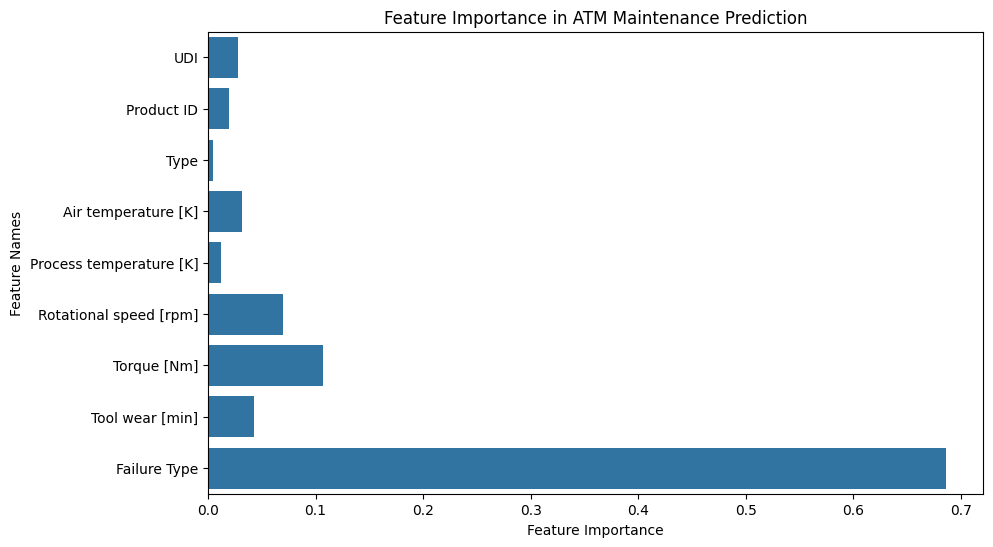

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import json
import chardet
import joblib
import os

# Detect encoding
file_path = "predictive_maintenance.csv"  # Ensure this path is correct
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Check if it's actually a CSV file
if file_path.endswith(".zip"):
    raise ValueError("The provided file is a ZIP. Extract and use the actual CSV.")

if file_path.endswith(".xlsx"):
    print("Detected an Excel file. Reading as Excel...")
    df = pd.read_excel(file_path)
else:
    # Detect encoding
    with open(file_path, "rb") as f:
        raw_data = f.read(10000)
        result = chardet.detect(raw_data)
        encoding_detected = result["encoding"] if result["encoding"] else "ISO-8859-1"

    # Load CSV
    df = pd.read_csv(file_path, encoding=encoding_detected, engine="python", on_bad_lines="skip")

# Check if the file was loaded properly
print("First 5 Rows of Data:")
print(df.head())

# Validate column names
print("Column Names:", df.columns.tolist())

# Ensure 'target_column' exists in the dataset
target_column = "Target"  # Updated based on dataset columns
if target_column not in df.columns:
    raise ValueError(f"❌ Target column '{target_column}' not found in dataset. Available columns: {df.columns.tolist()}")

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables if any
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Save label encoders
with open("label_encoders.json", "w") as f:
    json.dump({col: le.classes_.tolist() for col, le in label_encoders.items()}, f)

# Define features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the model and scaler
joblib.dump(model, "atm_maintenance_model.pkl")
joblib.dump(scaler, "scaler.pkl")

# Ensure feature importance visualization works
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Feature Importance in ATM Maintenance Prediction")
plt.show()


In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


C:\Users\edeng\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [20]:

# Define features & target
X = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']]
y = df['Target']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# Save updated model & scaler
joblib.dump(model, "atm_maintenance_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']